## Notebook contendo as respostas da atividade 4

In [1]:
import pandas as pd

#aumentando o limite de linhas nos outputs do notebook
pd.set_option('display.max_rows', 150)


In [2]:
#carregando dataframe pandas do data catalog

df = catalog.load('exames_por_paciente_sp@pandas')
df.head()

2021-08-24 05:51:30,162 - kedro.io.data_catalog - INFO - Loading data from `exames_por_paciente_sp@pandas` (ParquetDataSet)...


,ID_PACIENTE,DT_COLETA,DE_ORIGEM,DE_EXAME,DE_ANALITO,DE_RESULTADO,CD_UNIDADE,DE_VALOR_REFERENCIA,IC_SEXO,CD_UF,CD_MUNICIPIO,CD_CEPREDUZIDO,CD_PAIS,VL_IDADE
0,41745d8d7d1d480ec8e79211ec5e5e2cfb568879,2020-07-09,HOSP,Dosagem de Uréia,Uréia,39,mg/dL,17 a 49,F,SP,SAO PAULO,SAO PAULO,BR,90.0
1,41745d8d7d1d480ec8e79211ec5e5e2cfb568879,2020-07-11,HOSP,Sorologia SARS-CoV-2/COVID19 IgG/IgM,COVID IgG Interp,reagente,NULL,Não Reagente,F,SP,SAO PAULO,SAO PAULO,BR,90.0
2,4178297f1e27ad327612ef1d0407b19d2b746008,2020-05-17,HOSP,Hemograma com Plaquetas,Volume Médio Plaquetário,11.9,fL,6.5 a 15.0,M,SP,SAO PAULO,SAO PAULO,BR,60.0
3,417a73057ad66cf0a5e2cc5c25da5ee9403e28f4,2020-02-03,HOSP,Hemograma com Plaquetas,RDW,12.6,%,11.5 a 16.5,F,SP,MOGI DAS CRUZES,MOGI DAS CRUZES,BR,40.0
4,417aa9d1894373aa7ff6b82e32ef9a328726eff0,2020-02-17,HOSP,Urina Tipo I,Aspecto,límpido,NULL,Límpido,F,SP,SAO PAULO,SAO PAULO,BR,35.0


In [3]:
#filtrando valores não numéricos do campo 'DE_RESULTADO'
#para isso, removo temporariamente o separador decimal, para que o método isdigit() consiga detectar corretamente
#se a string é um número

df_qualitative = df[df["DE_RESULTADO"].apply(lambda x: not x.strip().replace('.','').isdigit())]
df_qualitative.head()

,ID_PACIENTE,DT_COLETA,DE_ORIGEM,DE_EXAME,DE_ANALITO,DE_RESULTADO,CD_UNIDADE,DE_VALOR_REFERENCIA,IC_SEXO,CD_UF,CD_MUNICIPIO,CD_CEPREDUZIDO,CD_PAIS,VL_IDADE
1,41745d8d7d1d480ec8e79211ec5e5e2cfb568879,2020-07-11,HOSP,Sorologia SARS-CoV-2/COVID19 IgG/IgM,COVID IgG Interp,reagente,NULL,Não Reagente,F,SP,SAO PAULO,SAO PAULO,BR,90.0
4,417aa9d1894373aa7ff6b82e32ef9a328726eff0,2020-02-17,HOSP,Urina Tipo I,Aspecto,límpido,NULL,Límpido,F,SP,SAO PAULO,SAO PAULO,BR,35.0
10,4194eddd003a49f5c543bb0e0e85adb9e1377d93,2019-11-09,HOSP,Urina Tipo I,Pigmentos biliares,ausentes,NULL,Ausentes,F,SP,CARAPICUIBA,CARAPICUIBA,BR,30.0
16,419680740807397b02a6050b9734ae7de7e21683,2020-07-09,HOSP,Urina Tipo I,Urobilinogênio,positivo,NULL,Normal,F,SP,SAO PAULO,SAO PAULO,BR,72.0
24,41ac68631dfc99a7ab25d51c15d83e4d84802df6,2020-06-03,HOSP,PCR em tempo real para detecção de Coron,Resultado COVID-19:,não detectado,NULL,Não detectado,F,SP,SAO PAULO,SAO PAULO,BR,81.0


<AxesSubplot:>

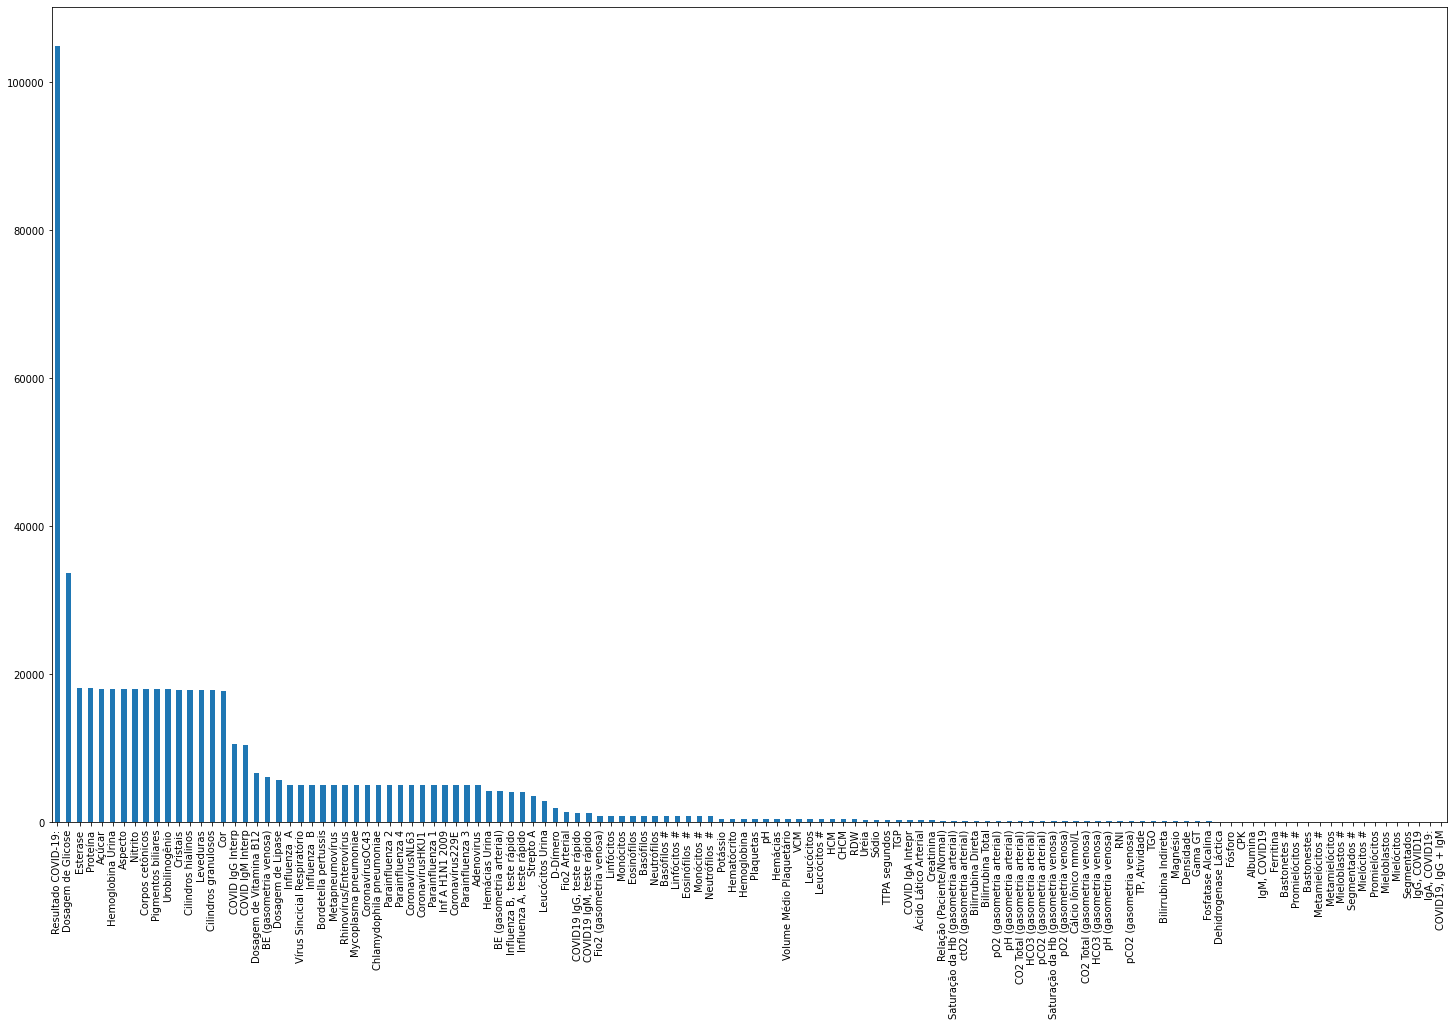

In [4]:
#gerando histograma com os valores de 'DE_ANALITO' na ordem descrescente de frequência

df_qualitative['DE_ANALITO'].value_counts().plot(kind="bar", figsize=(25,15))

<AxesSubplot:>

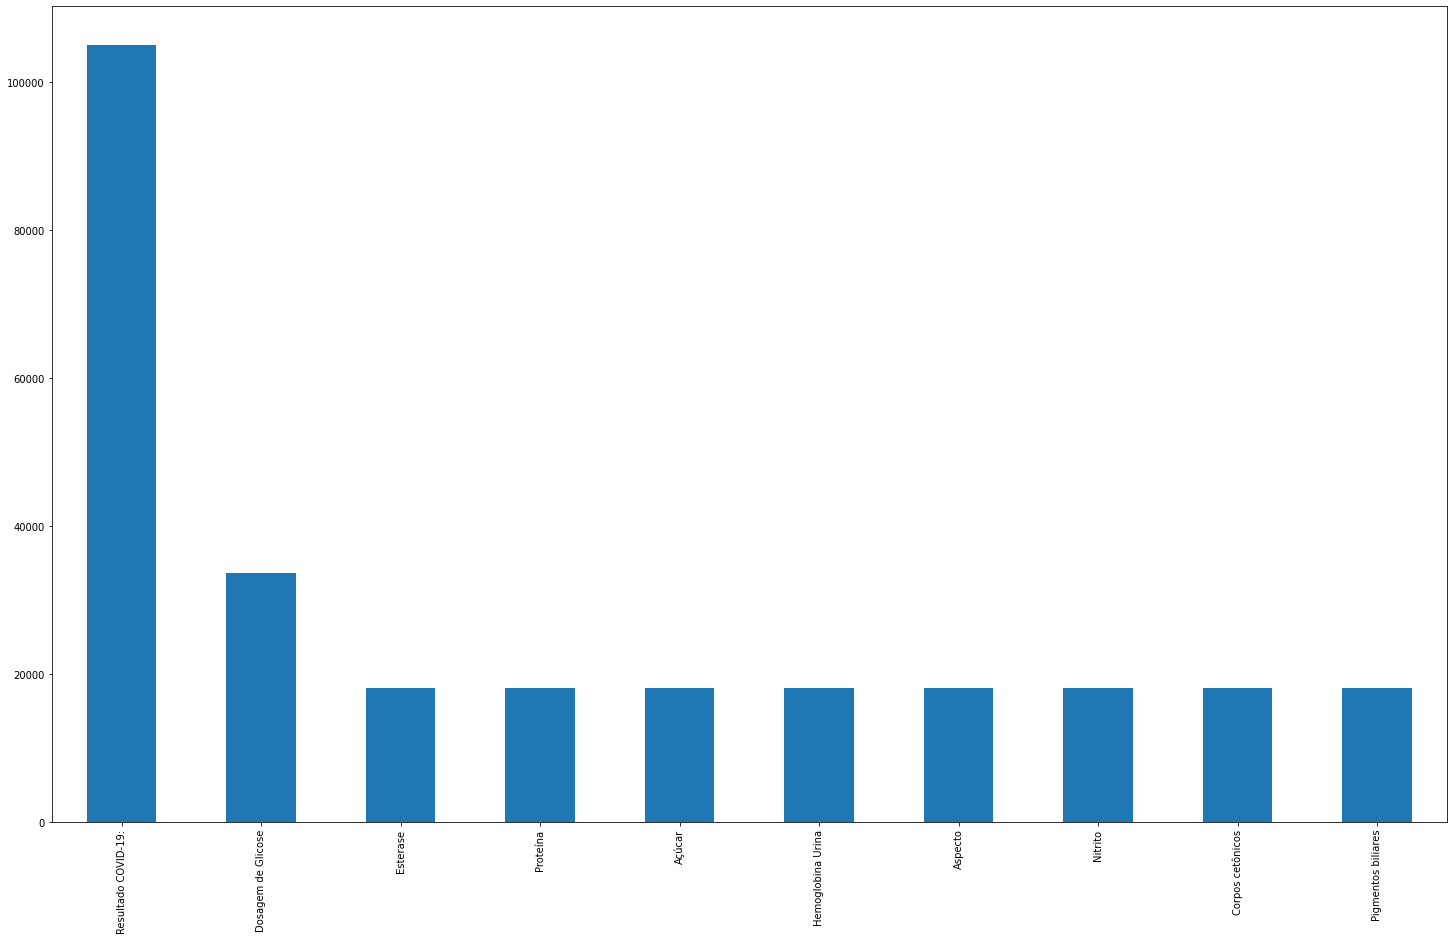

In [5]:
#como a visualização fica prejudicada pelo alto número de categorias diferentes, aqui eu gero um gráfico com 
#apenas os 10 valores mais comuns

df_qualitative['DE_ANALITO'].value_counts().nlargest(10).plot(kind="bar", figsize=(25,15))